In [96]:
import omegaconf
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ultk.effcomm.rate_distortion import ib_encoder_to_point

# Lets us import ibsg modules
import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")
from game.game import Game

from tqdm import tqdm


In [97]:
# Fix one param config

# parent = Path("/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=-8/dist=squared_dist/meaning_certainty=0/dynamics=imprecise_conditional_imitation/ii=0/discr_need=0/population_init=0/population_size=None/num_runs=1/seed=0")

parent = Path("/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=-8/dist=squared_dist/meaning_certainty=0/dynamics=imprecise_conditional_imitation/ii=0/discr_need=-3/population_init=0/population_size=None/num_runs=1/seed=0")

config = omegaconf.OmegaConf.load(parent / ".hydra/config.yaml")
g = Game.from_hydra(config)

In [98]:
# bound data
betas = np.load('/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=-8/dist=squared_dist/meaning_certainty=0/betas.npy')

optimal_encoders = np.load('/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=-8/dist=squared_dist/meaning_certainty=0/optimal_encoders.npy')

curve_data = pd.read_csv('/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=-8/dist=squared_dist/meaning_certainty=0/curve_points.csv')


# simulation data

emergent_encoders = np.load(parent / 'final_encoders.npy')

sim_data = pd.read_csv(parent / 'simulation_points.csv')


In [99]:
# To visualize the encoders over the 1D domain, 
# assign each point in the meaning space to a point in a mpl cmap
# then for each word, take its mean meaning point,
# in particular take color_w = sum_m q(w|m) color(m)

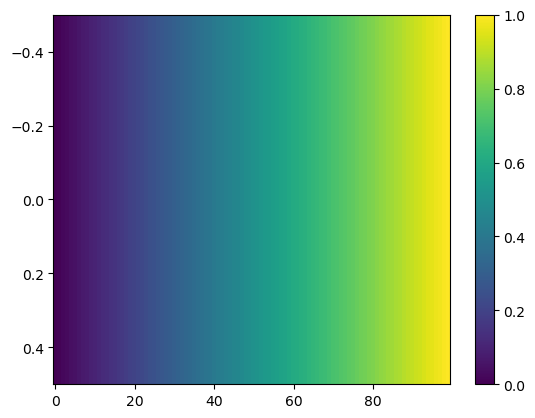

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Choose your colormap
colormap = plt.get_cmap('viridis')

# Generate 100 equally spaced values between 0 and 1
values = np.linspace(0, 1, 100)

# Get the corresponding colors from the colormap
colors = colormap(values)

# Create a LinearSegmentedColormap
segmented_cmap = mcolors.LinearSegmentedColormap.from_list('segmented_cmap', colors)

# Plot the colormap
plt.imshow(np.linspace(0, 1, 100).reshape(1, -1), cmap=segmented_cmap, aspect='auto')
plt.colorbar()
plt.show()

# Get the numerical values corresponding to the regions
numerical_values = np.linspace(0, 1, 100)
print(numerical_values)


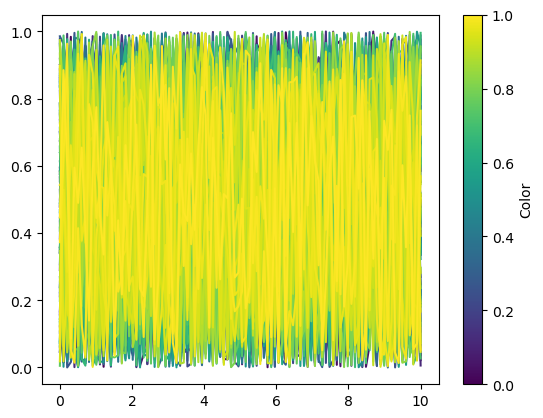

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Generate some example data for 100 lines
num_lines = 100
x = np.linspace(0, 10, 100)
y = np.random.rand(num_lines, 100)  # Random y values for each line

# Choose your colormap
colormap = plt.get_cmap('viridis')

# Generate 100 equally spaced values between 0 and 1
values = np.linspace(0, 1, 100)

# Get the corresponding colors from the colormap
colors = colormap(values)

# Plot each line with its corresponding color
for i in range(num_lines):
    plt.plot(x, y[i], color=colors[i])

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 1))
sm.set_array([])
plt.colorbar(sm, label='Color')

plt.show()


In [102]:
# Above, we have x = meanings, and 
# instead of random y values, we have words -> avg meanings for those words, i.e., some values in the same space as x.

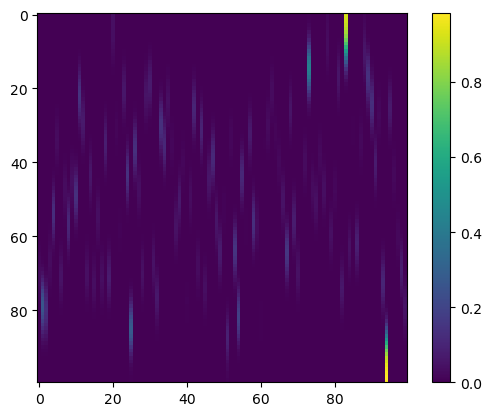

In [103]:
# qW_M  = optimal_encoders[1000]
qW_M = emergent_encoders[0]
plt.imshow(qW_M)
plt.colorbar()
plt.show()

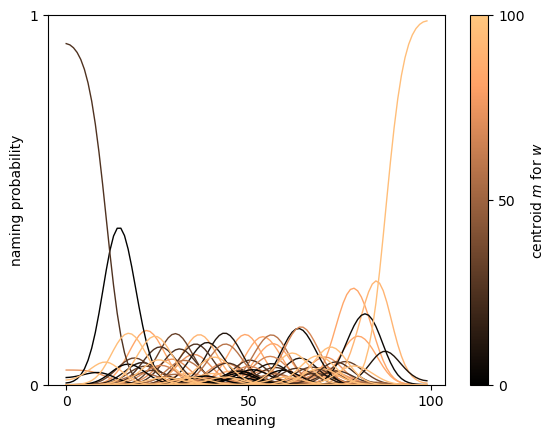

In [115]:
# Choose your colormap
colormap = plt.get_cmap('copper')

# Generate 100 equally spaced values between 0 and 1
values = np.linspace(0, 1, 100)

# Get the corresponding colors from the colormap
colors = colormap(values)

# qW_M  = optimal_encoders[1000]
qW_M = emergent_encoders[0]
prior = g.prior

# Get bayesian q(m|w)
qWM = qW_M * prior[:, None]
qW = qW_M.T @ prior
qM_W = np.where(qW > 1e-16, qWM / qW, 1 / qWM.shape[0]).T

word_colors = []
for word_idx in range(len(qW_M)):
    qm_w = qW_M[word_idx]
    # get color <- sum_m p(m|w) color(m)

    # try just argmax color first
    m = np.argmax(qm_w)
    color_w = colors[m]

    # color_w = np.sum(qm_w[:, None] * colors, axis=0)
    # not sure why i need to normalize but i will
    # color_w /= color_w.sum()

    word_colors.append(color_w)


x = list(range(100))
# Plot each line with its corresponding color
for word_idx in range(len(y)):
    plt.plot(
        x,
        qW_M.T[word_idx],
        color=word_colors[word_idx], 
        linewidth=1,
    )

plt.ylim(0,1)

plt.yticks(
    ticks=[0,1],
)
plt.xticks(
    ticks=[0,50,100],
)
plt.xlabel("meaning")
plt.ylabel("naming probability")
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 100))
sm.set_array([])
plt.colorbar(sm, label='centroid $m$ for $w$', ticks=[0,50,100])
plt.show()

In [122]:
# turn into a function and let's visualize how the encoders evolve.

# Choose your colormap
colormap = plt.get_cmap('copper')

# Generate 100 equally spaced values between 0 and 1
values = np.linspace(0, 1, 100)

# Get the corresponding colors from the colormap
colors = colormap(values)

prior = g.prior

def get_lineplot(qW_M: np.ndarray):
    # Get bayesian q(m|w)
    qWM = qW_M * prior[:, None]
    qW = qW_M.T @ prior
    qM_W = np.where(qW > 1e-16, qWM / qW, 1 / qWM.shape[0]).T

    word_colors = []
    for word_idx in range(len(qW_M)):
        qm_w = qW_M[word_idx]
        # get color <- sum_m p(m|w) color(m)

        # try just argmax color first
        m = np.argmax(qm_w)
        color_w = colors[m]

        # color_w = np.sum(qm_w[:, None] * colors, axis=0)
        # not sure why i need to normalize but i will
        # color_w /= color_w.sum()

        word_colors.append(color_w)


    x = list(range(100))
    # Plot each line with its corresponding color
    for word_idx in range(len(y)):
        plt.plot(
            x,
            qW_M.T[word_idx],
            color=word_colors[word_idx], 
            linewidth=1,
        )

    plt.ylim(0,1)

    plt.yticks(
        ticks=[0,1],
    )
    plt.xticks(
        ticks=[0,50,100],
    )
    plt.xlabel("meaning")
    plt.ylabel("naming probability")
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 100))
    sm.set_array([])
    plt.colorbar(sm, label='centroid $m$ for $w$', ticks=[0,50,100])
    plt.show()

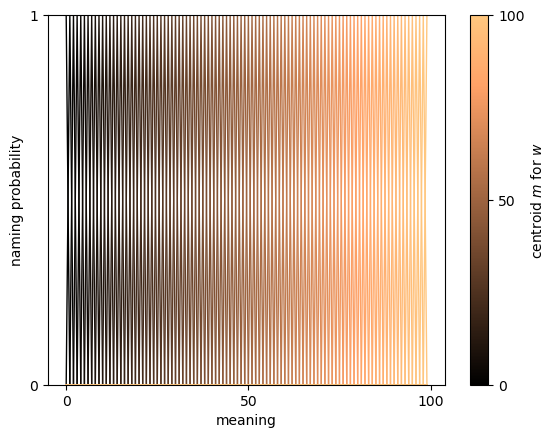

In [127]:
from IPython.display import clear_output

indices = np.arange(0, len(optimal_encoders), step=100)
encoders = optimal_encoders[indices]

for idx, encoder in enumerate(encoders):
    print(f"encoder {idx}", flush=True)
    clear_output(True)
    get_lineplot(encoder)